Predicting temperment to maybe make more specialized training classes for dogs based on predicted tendencies

## import libraries, packages, data

### libraries, packages

In [1]:
#import
import pandas as pd
import numpy as np
# import seaborn as sns
# sns.set(style='darkgrid')
import matplotlib.pyplot as plt
# %matplotlib inline
# import pandas_profiling
# import datetime
# import re
# import pprint
# pp = pprint.PrettyPrinter(indent=4)
# from collections import Counter
import warnings
warnings.filterwarnings('ignore')

#display multiple outputs from cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#importing libraries & packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#display multiple outputs from cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# machine learning
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

Using TensorFlow backend.


### import clean data from part 1

In [3]:
#df.info()

In [4]:
# import Animal Control Incidents df
df = pd.read_csv('a_control.csv')

df = df[df['species']=='dog']

df.temperment.value_counts()

df = df[['breed', 'size', 'color', 'temperment' ]]

df=df.dropna()

# # assign target
y = df["temperment"]

#remove target from features
df.drop(columns= ['temperment'], axis=1, inplace=True)

# dummy categorical features
#col_list = list(df.select_dtypes(include=['object']).columns)
col_list = list(df.columns)

# create dummies for categorical features, assign to X
df = pd.DataFrame(pd.get_dummies(data=df, drop_first=True
                   , prefix=col_list))
X = df


friendly     9078
normal       6240
nervous      4550
dangerous     613
Name: temperment, dtype: int64

In [5]:

# X_train_d and y_train_d = using original standard test train spit dad
# that way, I can try out different resampling methods
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=33)

### functions

In [6]:
# print model report
def model_report(model, cm = True): 
    
    print('\nCross Validation Scoring:\n')
    
    train_score = model.score(X_train, y_train)
    print("train score: {:.4}%".format(train_score * 100))

    test_score = model.score(X_test, y_test)
    print("test score: {:.4}%".format(test_score * 100))
    
    if cm :

        cv_score = np.mean(cross_val_score(model, X, y, cv=3))
        print("cross val score: {:.4}%".format(cv_score * 100))

        print("\nClassification Report:")
        print(classification_report(actuals, predictions))

#         col_list = ['pred bite/dangerous', 'pred not_bite/not_dangerous']
#         ind_list = ['real bite/dangerous', 'real not_bite/not_dangerous']                     
# #         for x in y_test.unique():
# #             col_list.append('pred_'+ x)
# #             ind_list.append('real_'+x)


        print('\nConfusion matrix:'.format(accuracy_score))
        display(pd.DataFrame(confusion_matrix(y_test, predictions)
                             
#                              , columns=col_list, index=ind_list
                            ))


    else:
        pass

In [7]:
def plot_feats(model):
    n_features = X.shape[1]
    plt.figure(figsize=(8,10))
#     plt.barh(range(n_features), model.feature_importances_, align='center') 
#     plt.yticks(np.arange(n_features), (X.columns.values)) 
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(25).plot(kind='barh');
    plt.show();

In [8]:
def plot_matrix(classifier):

    disp = plot_confusion_matrix(classifier, X_test, y_test,
    #                                  display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
#     disp.ax_.set_title(title);
    plt.show();
#     np.set_printoptions(precision=2)

#     # Plot non-normalized confusion matrix
#     titles_options = [
#                       ("Normalized confusion matrix", 'true')]
#     for title, normalize in titles_options:
#         disp = plot_confusion_matrix(classifier, X_test, y_test,
#     #                                  display_labels=class_names,
#                                      cmap=plt.cm.Blues,
#                                      normalize=normalize)
#         disp.ax_.set_title(title)

# #         print(title)
# #         print(disp.confusion_matrix)

#     plt.show();

## prep data

### resampling

Due to the imbalance of class data, it could be beneficial to resample to compensate for the missing data. Using SMOTE to oversample, then random undersampling.

In [9]:
over = SMOTE({'dangerous':1500},random_state=3)
under = RandomUnderSampler({'nervous':1500, 'normal':1500, 'friendly':1500},random_state=3)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)

print (y_train.value_counts())

normal       1500
friendly     1500
dangerous    1500
nervous      1500
Name: temperment, dtype: int64


## __modeling__

Logistic Regression basic default model

In [10]:
lr = LogisticRegression(random_state=3)
lr.fit(X_train, y_train)
 
# Predict on training set
predictions = lr.predict(X_test)
actuals = y_test

model_report(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Cross Validation Scoring:

train score: 44.67%
test score: 32.73%
cross val score: 44.21%

Classification Report:
              precision    recall  f1-score   support

   dangerous       0.07      0.40      0.11       177
    friendly       0.53      0.34      0.41      2634
     nervous       0.28      0.31      0.30      1326
      normal       0.33      0.32      0.32      1812

    accuracy                           0.33      5949
   macro avg       0.30      0.34      0.29      5949
weighted avg       0.40      0.33      0.35      5949


Confusion matrix:


,0,1,2,3
0,70,26,43,38
1,411,888,562,773
2,258,276,413,379
3,314,488,434,576


### decision tree

__default model__

In [11]:
# initialize and fit default decision tree
dt_model = DecisionTreeClassifier(random_state=3)
dt_model.fit(X_train, y_train)
predictions = dt_model.predict(X_test)
#actuals = y_test

model_report(dt_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')


Cross Validation Scoring:

train score: 54.52%
test score: 30.86%
cross val score: 42.21%

Classification Report:
              precision    recall  f1-score   support

   dangerous       0.07      0.53      0.12       177
    friendly       0.50      0.38      0.43      2634
     nervous       0.26      0.23      0.24      1326
      normal       0.32      0.25      0.28      1812

    accuracy                           0.31      5949
   macro avg       0.29      0.34      0.27      5949
weighted avg       0.38      0.31      0.33      5949


Confusion matrix:


,0,1,2,3
0,93,25,31,28
1,552,990,478,614
2,358,373,304,291
3,416,600,347,449


#### grid searches

In [19]:
# set random search params
criterion=['gini','entropy']
max_leaf_nodes = [None,200,300,500]
max_features = [100,140,170,200,225]
max_depth = [None,100,125,150,175,200]
min_samples_split = [1,2,3,4,5,6]
min_samples_leaf = [1]

random_grid = {'criterion':criterion,
               'max_leaf_nodes': max_leaf_nodes,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

# random grid search
dt_random = RandomizedSearchCV(estimator = dt_model
                               , param_distributions = random_grid
                               , n_iter = 100, cv = 5, verbose=3, error_score=0
                               , random_state=3, n_jobs = -1);
# fit random search model
dt_random.fit(X_train, y_train);

print('best score: {:.4}%'.format(dt_random.best_score_ * 100));
print(dt_random.best_params_);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


best score: 40.57%
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 200, 'max_features': 140, 'max_depth': 175, 'criterion': 'entropy'}


__grid search__

In [22]:
# grid search params
param_grid_dt = {'criterion': ['entropy', 'gini'],
    'max_depth': [140,175,200, None],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2],
     'max_features':[120,140,170,190],
     'max_leaf_nodes':[None,150,200,250,290]
        }

# grid search
gs_dt = GridSearchCV(estimator=dt_model,param_grid=param_grid_dt,error_score=0,
                    cv=5, n_jobs=-1, verbose=2)

# fitting grid search
gs_dt.fit(X_train, y_train)

# best parameters
print('Best score: {:.3}%'.format(gs_dt.best_score_ * 100))
print('params:\n', gs_dt.best_params_)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 712 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1522 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2125 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2732 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 3421 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 4220 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 13.4min finished


GridSearchCV(cv=5, error_score=0,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=3, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [140, 175, 200, None],
           

Best score: 40.8%
params:
 {'criterion': 'entropy', 'max_depth': 140, 'max_features': 140, 'max_leaf_nodes': 290, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [14]:
# using best params to fit model
dt_gs_model = DecisionTreeClassifier(criterion='gini',
                              max_depth=130,
                              max_features=110,
                              max_leaf_nodes= None,
                               min_samples_leaf=1,
                               min_samples_split=5
                                 )
dt_gs_model.fit(X_train, y_train)

predictions = dt_gs_model.predict(X_test)
actuals = y_test

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=130, max_features=110, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### final model

In [15]:
model_report(dt_gs_model)


Cross Validation Scoring:

train score: 53.9%
test score: 30.58%
cross val score: 42.04%

Classification Report:
              precision    recall  f1-score   support

   dangerous       0.07      0.52      0.12       177
    friendly       0.49      0.37      0.42      2634
     nervous       0.26      0.22      0.24      1326
      normal       0.32      0.25      0.28      1812

    accuracy                           0.31      5949
   macro avg       0.28      0.34      0.26      5949
weighted avg       0.37      0.31      0.33      5949


Confusion matrix:


,0,1,2,3
0,92,27,30,28
1,546,980,474,634
2,356,380,291,299
3,410,607,339,456


In [23]:
plot_matrix(dt_gs_model)

NameError: name 'normalize' is not defined

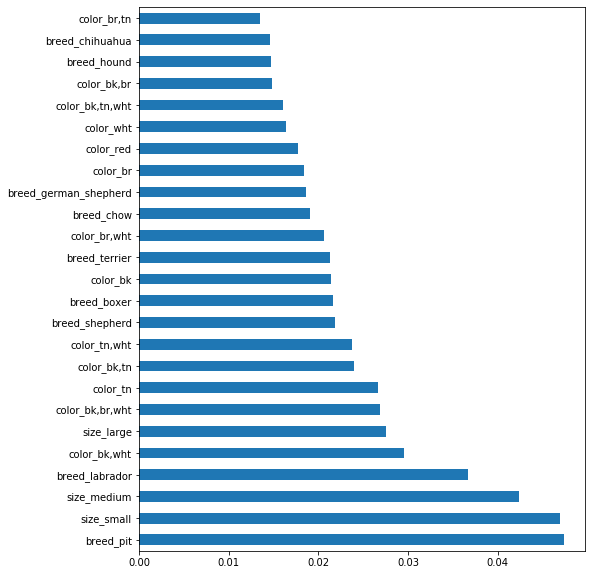

In [24]:
plot_feats(dt_gs_model)

### Random Forest

---
__default model__

In [ ]:
#initialize and fit random forest
rf_model = RandomForestClassifier(random_state=3)
rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)
#actuals = y_test

model_report(rf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)


Cross Validation Scoring:

train score: 54.5%
test score: 29.32%


#### grid searches

___
__Random Grid Search__

The default model is overfitting. Some ways to avoid overfitting with random forests are: increasing the n_estimators, reducing max features, limiting max depth, and increasing min leaf samples can help construct a more robust fit. Being that it did perform well despite the overfitting, I decided not to go crazy playing with the parameters.

In [ ]:
# set random search params

n_estimators = [100,300,500,700,900,1000]
min_weight_fraction_leaf=[0.0, 0.001, 0.0001]
min_samples_split = [3,4,5,6,7,8,9]
min_samples_leaf = [2,3,5,10]
min_impurity_split = [0.0, 0.00001,1,2]
min_impurity_decrease = [0.0, 0.0001,1,2]
max_samples = [None, 20,30,40,50,60]
max_leaf_nodes = [None, 3,5,8,10,15,20,25]
max_features = ['auto', 3,5,6,8,20,50,70]
max_depth = [10,20,40,50,60,80,100,150]
criterion = ['entropy', 'gini']
bootstrap = [True, False]

# Create the random grid
random_grid = { 'n_estimators': n_estimators,
                 'min_weight_fraction_leaf': min_weight_fraction_leaf,
                 'min_samples_split': min_samples_split,
                 'min_samples_leaf': min_samples_leaf,
                 'min_impurity_split': min_impurity_split,
                 'min_impurity_decrease': min_impurity_decrease,
                 'max_samples': max_samples,
                 'max_leaf_nodes': max_leaf_nodes,
                 'max_features': max_features,
                  'max_depth': max_depth,
                 'criterion': criterion,
                 'bootstrap': bootstrap
              }

# fit and search random param combinations
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid
                               , n_iter = 150, cv = 5, verbose=5
                               , random_state=1,  n_jobs = -1);
# Fit the random search model
rf_random.fit(X_train, y_train);

# print best parameters
print('best score: {:.4}%'.format(rf_random.best_score_ * 100));
print(rf_random.best_params_);

___
__grid search__

In [ ]:
param_grid_rf = {
        'n_estimators': [500,550]
         , 'min_samples_leaf': [4,5,6]
         , 'min_samples_split':[4,5,6]
        , 'max_samples': [None]
       , 'max_leaf_nodes':[None]
         , 'max_features': ['auto', 70,80]
         , 'max_depth': [25,45]
         , 'criterion': ['gini']
         , 'bootstrap': [False]
}

# grid search
gs_rf = GridSearchCV(estimator=rf_model,param_grid=param_grid_rf
                    ,cv=5,refit=True,error_score=0
                    , n_jobs=-1, verbose=7)

# fitting grid search
gs_rf.fit(X_train, y_train);

# best parameters
print('best score: {:.4}%'.format(gs_rf.best_score_ * 100));
print('params:\n', gs_rf.best_params_);

#### final model

___
__best model__

In [ ]:
# fitting model using best params
rf_gs_model = RandomForestClassifier(
                                   bootstrap= False
                                    ,criterion= 'gini'
                                    , max_depth= 25
                                   , max_features = 'auto'
                                   , max_leaf_nodes = None
                                   , max_samples = None
                                    , min_samples_leaf = 5
                                   , min_samples_split = 5
                                    , n_estimators = 500
                                    );
rf_gs_model.fit(X_train, y_train);

predictions = rf_gs_model.predict(X_test);

# new model report
model_report(rf_gs_model)

In [ ]:
plot_matrix(rf_gs_model)

In [ ]:
plot_feats(rf_gs_model)

### AdaBoost

In [ ]:
#initialize and fit default model
ada_model = AdaBoostClassifier(random_state=3)
ada_model.fit(X_train, y_train)

predictions = ada_model.predict(X_test)
# actuals = y_test

___
__Default Model__

In [ ]:
model_report(ada_model)

#### grid searches

__Random Grid Search__

In [ ]:
#set random search params
learning_rate= [.9, 1,1.3, 1.5,1.8]

n_estimators = [50,100,200,300]

random_grid = {'learning_rate':learning_rate,
               'n_estimators': n_estimators
              }

#random grid search
ada_random = RandomizedSearchCV(estimator = ada_model
                               , param_distributions = random_grid
                               , n_iter = 15, cv = 3, verbose=2
                               , random_state=3, n_jobs = -1)
# Fit the random search model
ada_random.fit(X_train, y_train)

ada_random.best_params_

___
__grid search__

In [ ]:
#grid search params and fitting grid search
param_grid_ada = [
    {'n_estimators': [260,280,300],
    'learning_rate': [1.3,1.4,1.5, 1.6]}
]

# Construct Grid Search
gs_ada = GridSearchCV(estimator=ada_model,param_grid=param_grid_ada,
                    cv=3, n_jobs=-1, verbose=5)

# Fit using grid search
gs_ada.fit(X_train, y_train);

# Best accuracy and parameters
print('best score: {:.4}%'.format(gs_ada.best_score_ * 100))
print('params:\n', gs_ada.best_params_)

In [ ]:
# fit best params
ada_gs_model = AdaBoostClassifier(n_estimators=300,
                                   learning_rate=1.6)
ada_gs_model.fit(X_train, y_train);

predictions = ada_gs_model.predict(X_test)

#### final model

__best model__

In [ ]:
model_report(ada_gs_model)

### gradient boost

In [ ]:
#initialize and fit gradient boost
gbt_model = GradientBoostingClassifier(random_state=3)
gbt_model.fit(X_train, y_train)

predictions = gbt_model.predict(X_test)
# actuals = y_test

__default model__

In [ ]:
#baseline model report
model_report(gbt_model)

#### grid searches

__random grid search__

In [ ]:
# setting parameters for random search
learning_rate=[.2,.1, .09, .01]
loss = ['deviance', 'exponential']
max_depth = [None,2,3,10,20,50,90] 
n_estimators = [50,70,100,200,300]
min_samples_split = [1,2,4,7,10]
min_samples_leaf = [1,2,5,6,8,12]
min_weight_fraction_leaf = [0,0.0001, 0.001]

random_grid = {'learning_rate':learning_rate,
               'loss': loss,
               'max_depth': max_depth,
               'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               ,'min_weight_fraction_leaf': min_weight_fraction_leaf
               }

#searching random params
gbt_random = RandomizedSearchCV(estimator = gbt_model, param_distributions = random_grid
                               , n_iter = 150, cv = 3, verbose=3
                               , random_state=3, n_jobs = -1)
# fit random search model
gbt_random.fit(X_train, y_train)

print('best score: {:.4}%'.format(gbt_random.best_score_ * 100));
print(gbt_random.best_params_)

__grid search__

In [ ]:
# grid search params and run search
param_grid_gbt = [
    {'n_estimators': [50,60,70,80],
     'min_weight_fraction_leaf':[0.011, 0.01, 0.009],
    'learning_rate': [.005,0.1, .15,1],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_depth': [2,3,4]
    }]
# grid search
gs_gbt = GridSearchCV(estimator=gbt_model,
                    param_grid=param_grid_gbt
                    cv=3, n_jobs=-1, verbose=7)

# fit grid search
gs_gbt.fit(X_train, y_train)

# best params
print('best score: {:.4}%'.format(gs_gbt.best_score_ * 100))
print('params:\n', gs_gbt.best_params_)

In [ ]:
# fitting best params
gbt_gs_model = GradientBoostingClassifier(learning_rate=0.11,
                                         max_depth=4,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.009,
                                         n_estimators=60)
gbt_gs_model.fit(X_train, y_train)

predictions = gbt_gs_model.predict(X_test)

#### final model

__best model__

In [ ]:
# new model report
model_report(gbt_gs_model)

### SVM

In [ ]:
svm_model = svm.SVC(random_state=3)
svm_model.fit(X_train, y_train)

predictions = svm_model.predict(X_test)
# actuals = y_test

___
__default model__

In [ ]:
model_report(svm_model)

#### grid searches

___
__random grid search__

In [ ]:
# set random search params
clf_C = [0.01,0.07,0.1,1.0, 1.03, 1.07]
clf_gamma = [0.005,0.001,0.01, 0.1, 0.15]
clf_kernel = ['rbf', 'linear']

random_grid = {
               'C': clf_C,
               'gamma': clf_gamma,
               'kernel': clf_kernel
               }

# fit and search random param combinations
svm_random = RandomizedSearchCV(estimator = svm_model, param_distributions = random_grid
                               , n_iter = 25 , cv = 3, verbose=5 ,random_state=3, n_jobs = -1)
# Fit the random search model
svm_random.fit(X_train, y_train)

print('best score: {:.4}%'.format(svm_random.best_score_ * 100));
print(svm_random.best_params_)

___
__grid search__

In [ ]:
# Set grid search params
param_grid_svm = [
  {'C': [1.0, 1.01, 1.03], 'gamma': [0.008, 0.01, 0.012]
   , 'kernel': ['rbf', 'linear']
  }]
 
# Construct grid search
gs_svm = GridSearchCV(estimator=svm_model,
            param_grid=param_grid_svm, cv=5, verbose=3, return_train_score = True)

# Fit using grid search
gs_svm.fit(X_train, y_train)

# Best accuracy
print('best score: {:.4}%'.format(gs_svm.best_score_ * 100));
print('\nBest params:\n', gs_svm.best_params_)

In [ ]:
svm_gs_model = svm.SVC(C=1.0
                       ,gamma=0.008
                        ,kernel='linear'
                             )
svm_gs_model.fit(X_train, y_train)

predictions = svm_gs_model.predict(X_test)

#### final model

___
__best model__

In [ ]:
model_report(svm_gs_model)

### XGBoost

In [ ]:
# initiate model
xgb_model = XGBClassifier(random_state=3)
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)
# actuals = y_test

In [ ]:
model_report(xgb_model)

#### grid searches

In [ ]:
#set random search params
learning_rate=[.009,.01,.25,.2,.15 ,.1]
max_depth = [2,3,50,100,None]
min_child_weight = [.8,1,1.9]
n_estimators = [80,90,100]
min_weight_fraction_leaf = [0,0.0001]
gamma = [0.0, 0.001, 0.01]

random_grid = {
               'learning_rate':learning_rate
               ,'max_depth': max_depth
               ,'min_child_weight':min_child_weight
            ,'n_estimators': n_estimators
                , 'gamma':gamma
              }

# searching random params
xgb_random = RandomizedSearchCV(estimator = xgb_model, param_distributions = random_grid
                               , n_iter = 10, cv = 3, verbose=10
                               , random_state=3, n_jobs = -1)
# fit random search model
xgb_random.fit(X_train, y_train)
print('best score: {:.4}%'.format(xgb_random.best_score_ * 100));
print(xgb_random.best_params_);

In [ ]:
param_grid_xgb = [
    {
         'min_samples_split':[2,3],
         'gamma':[0.01,0.1,.05],
        'min_child_weight': [0.9,1,1.2],
    'learning_rate': [0.008,0.1, 0.005],
    'n_estimators': [150,200,250],
    'max_depth': [2,5]
    }
]

# Construct Grid Search
gs_xgb = GridSearchCV(estimator=xgb_model,
                    param_grid=param_grid_xgb,
                    cv=3, n_jobs=-1, verbose=10)

# Fit using grid search
gs_xgb.fit(X, y)

# Best accuracy and parameters
print('best score: {:.3}%'.format(gs_xgb.best_score_ * 100))
print('params:\n', gs_xgb.best_params_);

#### final model

In [ ]:
# fit using best params
xgb_gs_model = XGBClassifier(learning_rate=0.008,
                           #  max_depth=3,
                             min_child_weight=.9)
                          #   n_estimators=90)
xgb_gs_model.fit(X_train, y_train)

predictions = xgb_gs_model.predict(X_test)

model_report(xgb_gs_model)